<a href="https://colab.research.google.com/github/EnriqueAlfaro77/challenger1_alura/blob/main/challenger2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import requests

# 1. Cargar JSON desde la URL
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()

# 2. Normalizar el JSON anidado
df = pd.json_normalize(data)

# 3. Limpiar columna 'Churn'
df['Churn'] = df['Churn'].replace('', np.nan)

# 4. Renombrar columnas (reemplazar puntos por guiones bajos y pasar a minúsculas)
df.rename(columns=lambda x: x.replace('.', '_').lower(), inplace=True)

# 5. Columnas binarias correctas luego del rename
cols_binarias = [
    'churn',
    'customer_partner',
    'customer_dependents',
    'phone_phoneservice',
    'account_paperlessbilling'
]

# 6. Convertir 'Yes'/'No' a 1/0
for col in cols_binarias:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 7. Mostrar si aún hay nulos
print("\nValores nulos en columnas binarias:")
print(df[cols_binarias].isnull().sum())

# 8. Verificación final
print("\nPrimeras filas del DataFrame limpio:")
print(df.head())
print("\nTamaño del DataFrame:", df.shape)



Valores nulos en columnas binarias:
churn                       224
customer_partner              0
customer_dependents           0
phone_phoneservice            0
account_paperlessbilling      0
dtype: int64

Primeras filas del DataFrame limpio:
   customerid  churn customer_gender  customer_seniorcitizen  \
0  0002-ORFBO    0.0          Female                       0   
1  0003-MKNFE    0.0            Male                       0   
2  0004-TLHLJ    1.0            Male                       0   
3  0011-IGKFF    1.0            Male                       1   
4  0013-EXCHZ    1.0          Female                       1   

   customer_partner  customer_dependents  customer_tenure  phone_phoneservice  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0   

In [24]:
# Eliminar filas donde churn es nulo
df = df.dropna(subset=['churn'])

# Confirmar que ya no hay nulos
print("Valores nulos en 'churn' después de limpieza:", df['churn'].isnull().sum())
print("Tamaño del DataFrame después de limpieza:", df.shape)


Valores nulos en 'churn' después de limpieza: 0
Tamaño del DataFrame después de limpieza: (7043, 21)


In [28]:
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
customerid                   0
churn                        0
customer_gender              0
customer_seniorcitizen       0
customer_partner             0
customer_dependents          0
customer_tenure              0
phone_phoneservice           0
phone_multiplelines          0
internet_internetservice     0
internet_onlinesecurity      0
internet_onlinebackup        0
internet_deviceprotection    0
internet_techsupport         0
internet_streamingtv         0
internet_streamingmovies     0
account_contract             0
account_paperlessbilling     0
account_paymentmethod        0
account_charges_monthly      0
account_charges_total        0
dtype: int64


In [29]:
duplicados = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicados}")



Número de registros duplicados: 0


In [27]:
df = df.dropna(subset=['churn'])


In [30]:
for col in ['customer_gender', 'account_contract', 'internet_internetservice']:
    print(f"\nValores únicos en '{col}':")
    print(df[col].unique())



Valores únicos en 'customer_gender':
['Female' 'Male']

Valores únicos en 'account_contract':
['One year' 'Month-to-month' 'Two year']

Valores únicos en 'internet_internetservice':
['DSL' 'Fiber optic' 'No']


In [31]:
# Codificación binaria: Male/Female → 1/0
df['customer_gender'] = df['customer_gender'].map({'Male': 1, 'Female': 0})

# Codificación de internet_internetservice: No = 0, DSL = 1, Fiber optic = 2
df['internet_internetservice'] = df['internet_internetservice'].map({
    'No': 0,
    'DSL': 1,
    'Fiber optic': 2
})

# Codificación simplificada del tipo de contrato
df['account_contract_simple'] = df['account_contract'].map({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
})

# Crear nueva columna: Cuentas_Diarias (facturación mensual dividida por 30)
df['account_cuentas_diarias'] = df['account_charges_monthly'] / 30

# Verificación rápida
print("\nVerificación de columnas transformadas:")
print(df[['customer_gender', 'internet_internetservice', 'account_contract', 'account_contract_simple', 'account_cuentas_diarias']].head())



Verificación de columnas transformadas:
   customer_gender  internet_internetservice account_contract  \
0                0                         1         One year   
1                1                         1   Month-to-month   
2                1                         2   Month-to-month   
3                1                         2   Month-to-month   
4                0                         2   Month-to-month   

   account_contract_simple  account_cuentas_diarias  
0                        1                 2.186667  
1                        0                 1.996667  
2                        0                 2.463333  
3                        0                 3.266667  
4                        0                 2.796667  


In [32]:
print("Filas duplicadas:", df.duplicated().sum())


Filas duplicadas: 0


In [33]:
print(df.head())


   customerid  churn  customer_gender  customer_seniorcitizen  \
0  0002-ORFBO    0.0                0                       0   
1  0003-MKNFE    0.0                1                       0   
2  0004-TLHLJ    1.0                1                       0   
3  0011-IGKFF    1.0                1                       1   
4  0013-EXCHZ    1.0                0                       1   

   customer_partner  customer_dependents  customer_tenure  phone_phoneservice  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1                    0                3                   1   

  phone_multiplelines  internet_internetservice  ... internet_techsupport  \
0                  No                        

In [35]:
# 1. Convertir 'account_charges_total' a tipo numérico
df['account_charges_total'] = pd.to_numeric(df['account_charges_total'], errors='coerce')

# 2. Unificar valores como 'No internet service' y 'No phone service' a simplemente 'No'
cols_servicio = [
    'phone_multiplelines',
    'internet_onlinesecurity',
    'internet_onlinebackup',
    'internet_deviceprotection',
    'internet_techsupport',
    'internet_streamingtv',
    'internet_streamingmovies'
]

for col in cols_servicio:
    df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

# 3. Verificación rápida
print("\nVerificación de tipos de datos:")
print(df.dtypes)

print("\nValores únicos post-estandarización en columnas categóricas:")
for col in cols_servicio:
    print(f"{col}: {df[col].unique()}")



Verificación de tipos de datos:
customerid                    object
churn                        float64
customer_gender                int64
customer_seniorcitizen         int64
customer_partner               int64
customer_dependents            int64
customer_tenure                int64
phone_phoneservice             int64
phone_multiplelines           object
internet_internetservice       int64
internet_onlinesecurity       object
internet_onlinebackup         object
internet_deviceprotection     object
internet_techsupport          object
internet_streamingtv          object
internet_streamingmovies      object
account_contract              object
account_paperlessbilling       int64
account_paymentmethod         object
account_charges_monthly      float64
account_charges_total        float64
account_contract_simple        int64
account_cuentas_diarias      float64
dtype: object

Valores únicos post-estandarización en columnas categóricas:
phone_multiplelines: ['No' 'Yes']
intern

In [36]:
# Crear columna de cuentas diarias
df['account_cuentas_diarias'] = df['account_charges_monthly'] / 30

# Verificar las primeras filas
print("\nVerificación de la nueva columna:")
print(df[['account_charges_monthly', 'account_cuentas_diarias']].head())



Verificación de la nueva columna:
   account_charges_monthly  account_cuentas_diarias
0                     65.6                 2.186667
1                     59.9                 1.996667
2                     73.9                 2.463333
3                     98.0                 3.266667
4                     83.9                 2.796667


In [37]:
# 1. Análisis estadístico general
print("🔍 Estadísticas descriptivas generales:")
print(df.describe())

# 2. Análisis estadístico solo para variables numéricas seleccionadas (si quieres enfocarte)
numericas = [
    'customer_tenure',
    'account_charges_monthly',
    'account_charges_total',
    'account_cuentas_diarias'
]

print("\n📊 Estadísticas descriptivas de columnas clave:")
print(df[numericas].describe())


🔍 Estadísticas descriptivas generales:
             churn  customer_gender  customer_seniorcitizen  customer_partner  \
count  7043.000000      7043.000000             7043.000000       7043.000000   
mean      0.265370         0.504756                0.162147          0.483033   
std       0.441561         0.500013                0.368612          0.499748   
min       0.000000         0.000000                0.000000          0.000000   
25%       0.000000         0.000000                0.000000          0.000000   
50%       0.000000         1.000000                0.000000          0.000000   
75%       1.000000         1.000000                0.000000          1.000000   
max       1.000000         1.000000                1.000000          1.000000   

       customer_dependents  customer_tenure  phone_phoneservice  \
count          7043.000000      7043.000000         7043.000000   
mean              0.299588        32.371149            0.903166   
std               0.458110    

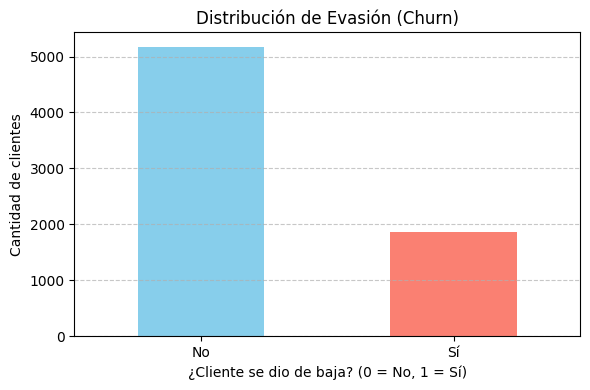

In [38]:
import matplotlib.pyplot as plt

# Conteo de valores
churn_counts = df['churn'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('¿Cliente se dio de baja? (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


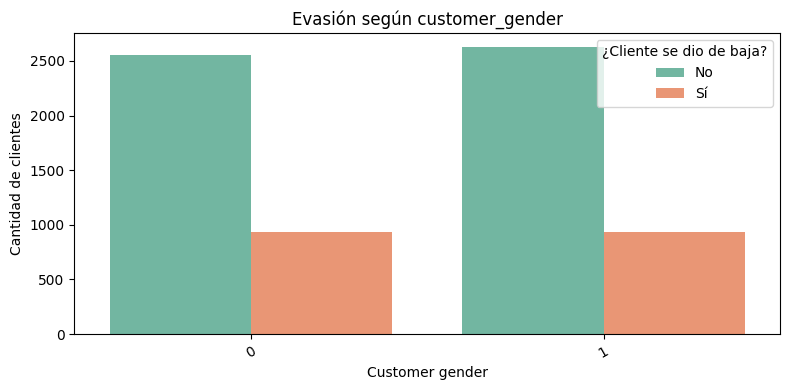

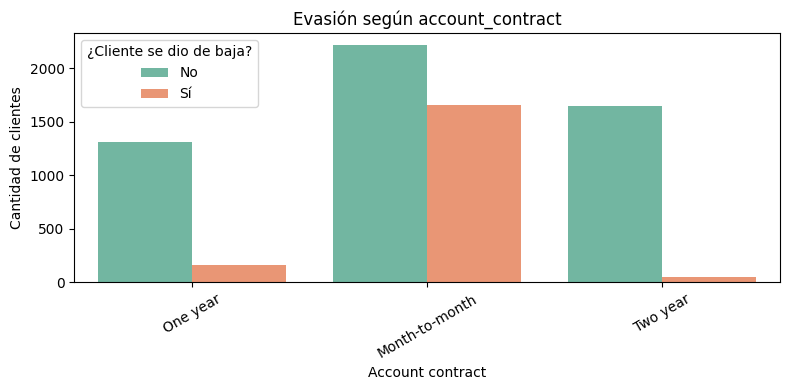

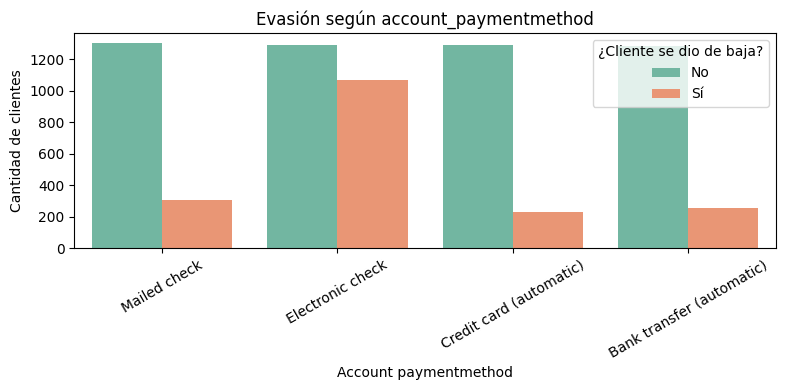

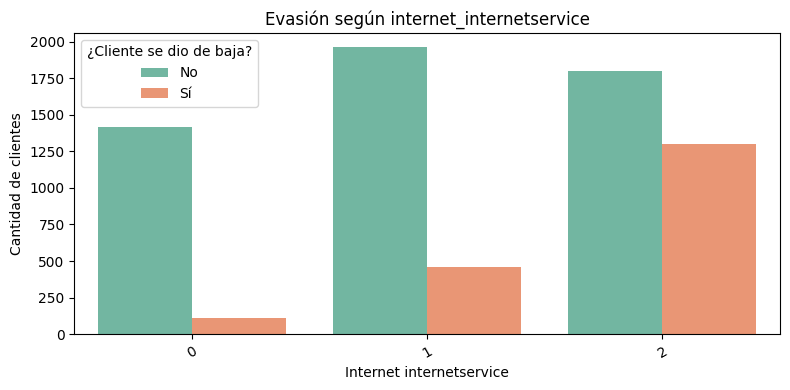

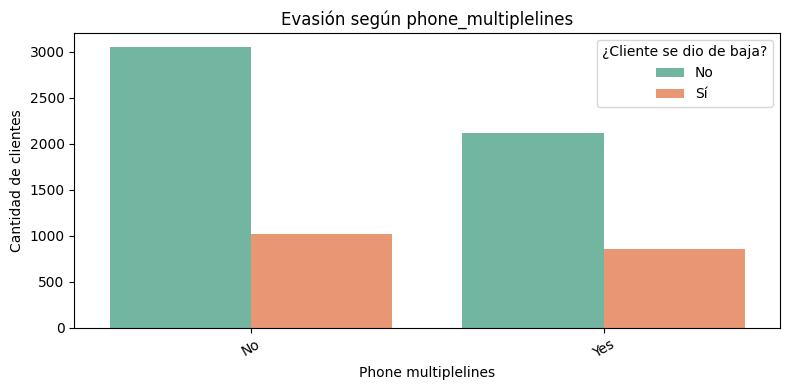

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos churn a texto para mejor visualización
df['churn_text'] = df['churn'].replace({0: 'No', 1: 'Sí'})

# Lista de variables categóricas relevantes
variables = ['customer_gender', 'account_contract', 'account_paymentmethod',
             'internet_internetservice', 'phone_multiplelines']

# Creamos gráficos para cada variable
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=var, hue='churn_text', palette='Set2')
    plt.title(f'Evasión según {var}')
    plt.ylabel('Cantidad de clientes')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.legend(title='¿Cliente se dio de baja?')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-41-18541228.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='account_charges_total', data=df, palette='Set2')


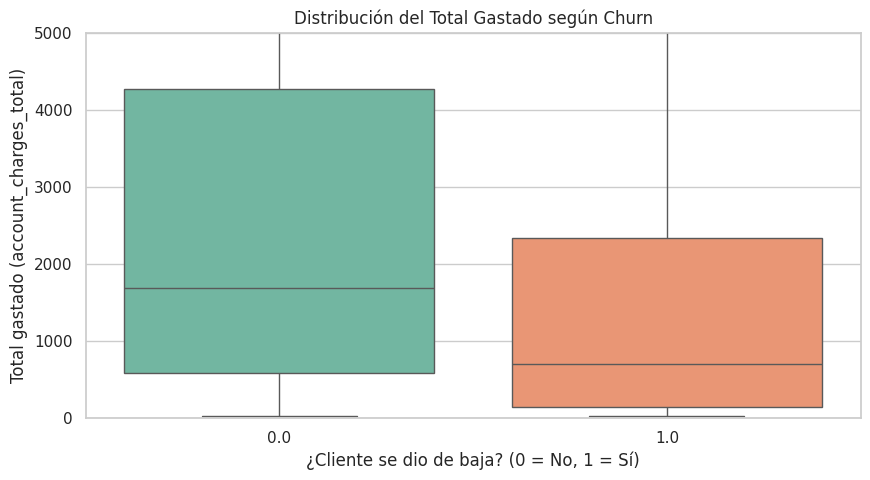

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='account_charges_total', data=df, palette='Set2')
plt.ylim(0, 5000)  # Limita el eje Y para no mostrar todos los outliers
plt.title('Distribución del Total Gastado según Churn')
plt.xlabel('¿Cliente se dio de baja? (0 = No, 1 = Sí)')
plt.ylabel('Total gastado (account_charges_total)')
plt.show()


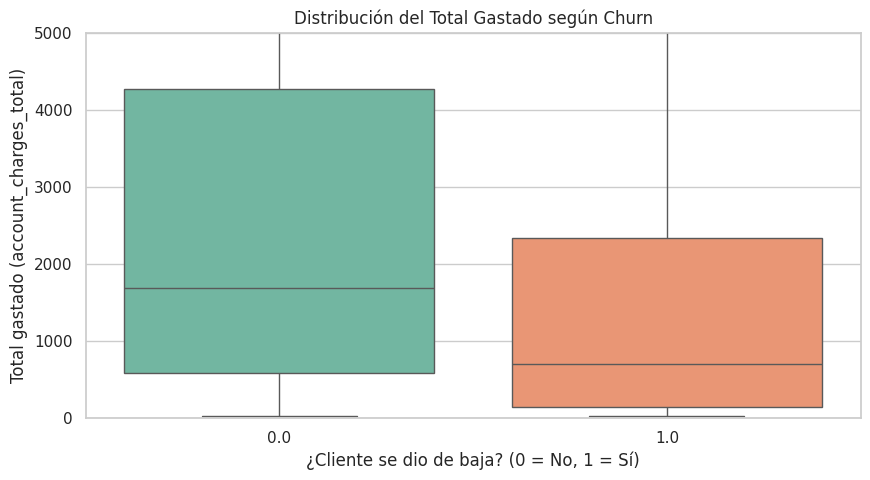

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='churn', y='account_charges_total', data=df, hue='churn', palette='Set2', legend=False)
plt.ylim(0, 5000)
plt.title('Distribución del Total Gastado según Churn')
plt.xlabel('¿Cliente se dio de baja? (0 = No, 1 = Sí)')
plt.ylabel('Total gastado (account_charges_total)')
plt.show()
